In [44]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#import geopandas
import pandas as pd
import numpy as np
#import folium
import gc
#from folium.plugins import TimeSliderChoropleth
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from statsmodels.api import add_constant

import statsmodels.api as sm


In [2]:
#Readin
dataframe = pd.read_csv("covid_19_clean_complete.csv")


In [3]:
#Renaming the Country/Region column
dataframe = dataframe.rename(columns={'Country/Region': 'Country'})


In [4]:
dataframe.tail(2)

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
17134,Turks and Caicos Islands,United Kingdom,21.694,-71.7979,3/29/20,4,0,0
17135,NaN,MS Zaandam,0.000,0.0000,3/29/20,2,0,0


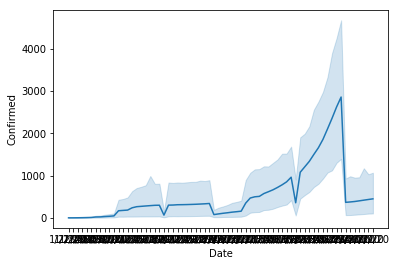

In [5]:
#looking for confimed cases from 1/22/20 to 3/29/20, day by day
ax = sns.lineplot(x="Date", y="Confirmed",
                  markers=True, dashes=False, data=dataframe)

In [6]:
#Converting Date column to date time format
dataframe['Date'] =  pd.to_datetime(dataframe['Date'], infer_datetime_format=True)

In [7]:
#Creating Week_Number column from Date column
dataframe['Week_Number'] = dataframe['Date'].dt.strftime('%U')


In [8]:
#dataframe['Date'] = pd.to_datetime(dataframe['Date'])

In [54]:
#Creating new dataframe to get the overview of the trends
new_df = dataframe[['Confirmed','Deaths','Date','Country','Week_Number']]


In [55]:
new_df.head(3)

,Confirmed,Deaths,Date,Country,Week_Number
0,0,0,2020-01-22,Afghanistan,03
1,0,0,2020-01-22,Albania,03
2,0,0,2020-01-22,Algeria,03


In [11]:
dataframe.head(10)

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Week_Number
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,03
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,03
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,03
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,03
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,03
5,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0,03
6,NaN,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0,03
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0,0,0,03
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,03
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,03


In [12]:
sorted_df = dataframe.sort_values(by='Confirmed', ascending=False)


In [13]:
sorted_df.head(10)

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Week_Number
17109,NaN,US,37.0902,-95.7129,2020-03-29,140886,2467,2665,13
16857,NaN,US,37.0902,-95.7129,2020-03-28,121478,2026,1072,12
16605,NaN,US,37.0902,-95.7129,2020-03-27,101657,1581,869,12
17021,NaN,Italy,43.0000,12.0000,2020-03-29,97689,10779,13030,13
16769,NaN,Italy,43.0000,12.0000,2020-03-28,92472,10023,12384,12
16517,NaN,Italy,43.0000,12.0000,2020-03-27,86498,9134,10950,12
16353,NaN,US,37.0902,-95.7129,2020-03-26,83836,1209,681,12
16265,NaN,Italy,43.0000,12.0000,2020-03-26,80589,8215,10361,12
17085,NaN,Spain,40.0000,-4.0000,2020-03-29,80110,6803,14709,13
16013,NaN,Italy,43.0000,12.0000,2020-03-25,74386,7503,9362,12


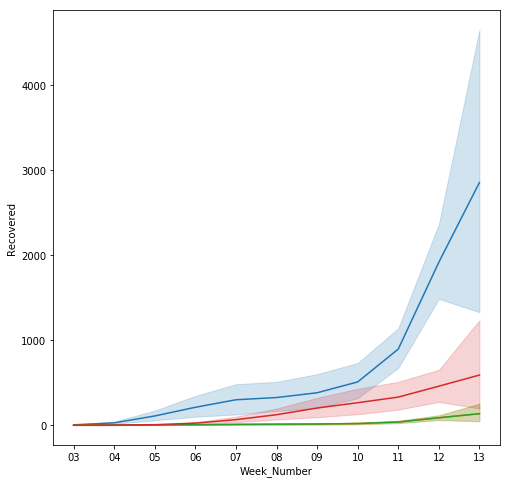

In [14]:
fig, (ax2) = plt.subplots(1, 1, figsize=(8,8))

ax1 = sns.lineplot(x="Week_Number", y="Confirmed",
                  markers=True, dashes=False, data=dataframe)

ax2 = sns.lineplot(x="Week_Number", y="Deaths",
                  markers=True, dashes=False, data=dataframe)
ax2 = sns.lineplot(x="Week_Number", y="Deaths",
                  markers=True, dashes=False, data=dataframe)
ax3 = sns.lineplot(x="Week_Number", y="Recovered",
                  markers=True, dashes=False, data=dataframe)


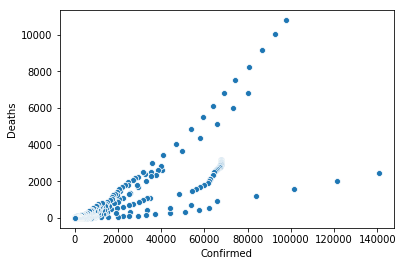

In [15]:
ax = sns.scatterplot(x="Confirmed", y="Deaths", data=sorted_df)

In [22]:
new_df.tail(1)

,Confirmed,Deaths,Date,Country
17135,2,0,2020-03-29,MS Zaandam


In [59]:
new_df['logConfirmed'] = np.log(new_df.Confirmed)
new_df['logDeaths'] = np.log(new_df.Deaths)

/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/recruit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [63]:
new_df.head(5)

,Confirmed,Deaths,Date,Country,Week_Number,logConfirmed,logDeaths
0,0,0,2020-01-22,Afghanistan,03,-inf,-inf
1,0,0,2020-01-22,Albania,03,-inf,-inf
2,0,0,2020-01-22,Algeria,03,-inf,-inf
3,0,0,2020-01-22,Andorra,03,-inf,-inf
4,0,0,2020-01-22,Angola,03,-inf,-inf


In [61]:
corr = new_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Confirmed,Deaths,logConfirmed,logDeaths
Confirmed,1,0.860121,0.406062,0.704549
Deaths,0.860121,1,0.316086,0.619818
logConfirmed,0.406062,0.316086,1,0.786433
logDeaths,0.704549,0.619818,0.786433,1


In [65]:
X = new_df.Week_Number
X = sm.add_constant(X)

In [66]:
y = new_df.logConfirmed

In [67]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).